# Análisis exploratorio de los datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.display.max_colwidth=400

In [3]:
df = pd.read_csv('cinemagix-movies.csv', index_col=0, parse_dates=True)

In [4]:
df.shape

(10000, 11)

12 características para 10.000 filas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, The Shawshank Redemption to The Last Boy
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YearOfRelease  10000 non-null  int64  
 1   RunTime        10000 non-null  int64  
 2   MovieRating    10000 non-null  float64
 3   Votes          10000 non-null  int64  
 4   MetaScore      7974 non-null   float64
 5   Gross          7085 non-null   float64
 6   Genre          10000 non-null  object 
 7   Certification  9631 non-null   object 
 8   Director       10000 non-null  object 
 9   Stars          10000 non-null  object 
 10  Description    10000 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 937.5+ KB


In [6]:
#Echaremos un primer vistazo a los datos
df.head()

,YearOfRelease,RunTime,MovieRating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
MovieName,,,,,,,,,,,
The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton', 'William Sadler']","['Over', 'the', 'course', 'of', 'several', 'years,', 'two', 'convicts', 'form', 'a', 'friendship,', 'seeking', 'consolation', 'and,', 'eventually,', 'redemption', 'through', 'basic', 'compassion.']"
The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', 'Diane Keaton']","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a', 'mafia', 'family,', 'decides', 'to', 'hand', 'over', 'his', 'empire', 'to', 'his', 'youngest', 'son', 'Michael.', 'However,', 'his', 'decision', 'unintentionally', 'puts', 'the', 'lives', 'of', 'his', 'loved', 'ones', 'in', 'grave', 'danger.']"
Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yago Sako', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman', 'Rael Padamsee']","['An', 'anime', 'adaptation', 'of', 'the', 'Hindu', 'epic', 'the', 'Ramayana,', 'where', 'Lord', 'Ram', 'combats', 'the', 'wicked', 'king', 'Ravana.']"
The Chaos Class,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Munir Ozkul', 'Halit Akcatepe', 'Tarik Akan']","['Lazy,', 'uneducated', 'students', 'share', 'a', 'very', 'close', 'bond.', 'They', 'live', 'together', 'in', 'the', 'dormitory,', 'where', 'they', 'plan', 'their', 'latest', 'pranks.', 'When', 'a', 'new', 'headmaster', 'arrives,', 'the', 'students', 'naturally', 'try', 'to', 'overthrow', 'him.', 'A', 'comic', 'war', 'of', 'nitwits', 'follows.']"
The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckhart', 'Michael Caine']","['When', 'the', 'menace', 'known', 'as', 'the', 'Joker', 'wreaks', 'havoc', 'and', 'chaos', 'on', 'the', 'people', 'of', 'Gotham,', 'Batman', 'must', 'accept', 'one', 'of', 'the', 'greatest', 'psychological', 'and', 'physical', 'tests', 'of', 'his', 'ability', 'to', 'fight', 'injustice.']"


In [6]:
df.describe()

,YearOfRelease,RunTime,MovieRating,Votes,MetaScore,Gross
count,10000.000000,10000.000000,10000.000000,1.000000e+04,7974.000000,7.085000e+03
mean,2001.413600,110.725000,6.727020,9.279738e+04,59.171432,4.017500e+07
std,18.597804,22.053073,0.821264,1.716509e+05,17.268795,6.748658e+07
min,1915.000000,45.000000,4.900000,1.000200e+04,7.000000,0.000000e+00
25%,1994.000000,96.000000,6.100000,1.685175e+04,47.000000,2.340000e+06
50%,2007.000000,107.000000,6.700000,3.417950e+04,60.000000,1.693000e+07
75%,2015.000000,121.000000,7.300000,9.154600e+04,72.000000,4.864000e+07
max,2023.000000,439.000000,9.300000,2.804443e+06,100.000000,9.366600e+08


In [7]:
missing_values = df.isnull().sum()
fig_missing = px.bar(
    x=missing_values.index, 
    y=missing_values.values, 
    labels={'y':'Cantidad de Valores Faltantes', 'x':'Variable'},
    title='Valores Faltantes por Variable'
)
fig_missing.show()

Tendremos que hacer Imputación en el caso de las 3 columnas MetaScore, Gross y Certification pues consideran una pérdida importante de información respecto al total de datos. En especial la variable Gross.

In [8]:
duplicated_rows = df.duplicated().sum()
print(duplicated_rows)

0


In [9]:
data_types = df.dtypes.value_counts()
fig_dtypes = px.bar(
    x=data_types.index.astype(str), 
    y=data_types.values, color = data_types.values,
    labels={'y':'Cantidad de Variables', 'x':'Tipo de Dato'},
    title='Cantidad de Variables por Tipo de Dato'
)
fig_dtypes.show()

Tenemos en su mayoría datos object o categóricos.

- Podemos observar que hay una cantidad considerable de valores nulos en las variables MetaScore, Gross y Certification.
- Nuestra variable objetivo "Gross" tiene casi un 30% de los datos perdidos, por lo tanto es necesario un trabajo de imputación antes de seguir trabajando el modelo.
- La desviación estándar de la variable "Gross" es alarmantemente alta, lo que significa que el éxito financiero de un film es difícil de predecir, necesitamos más contexto de la distribución de los datos mediante gráficos para visualizar cómo se distribuyen.

In [23]:
#Para una mejor visualización, trataremos los ingresos brutos en Millones
df['Gross'] = df['Gross']/10**6

In [24]:
df['Gross'].head()

MovieName
The Shawshank Redemption                28.34
The Godfather                          134.97
Ramayana: The Legend of Prince Rama       NaN
The Chaos Class                           NaN
The Dark Knight                        534.86
Name: Gross, dtype: float64

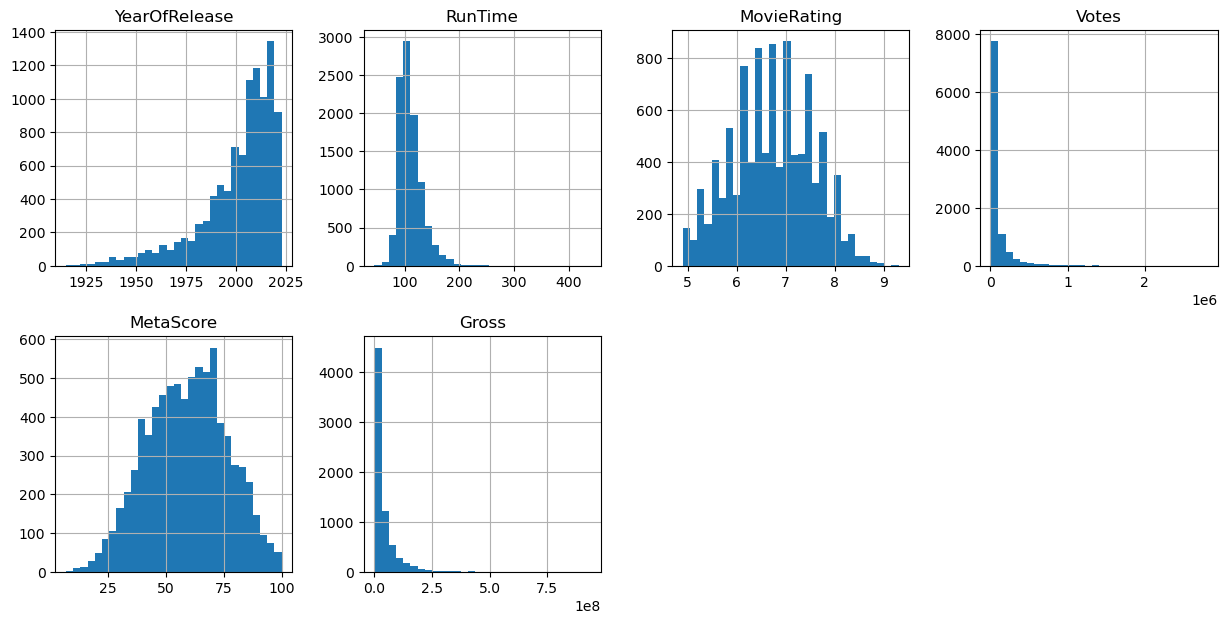

In [10]:
df.hist(bins=30, figsize=(15, 15), layout=(4, 4))
plt.show()

C:\Users\pablo\AppData\Local\Temp\ipykernel_1128\3601176126.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



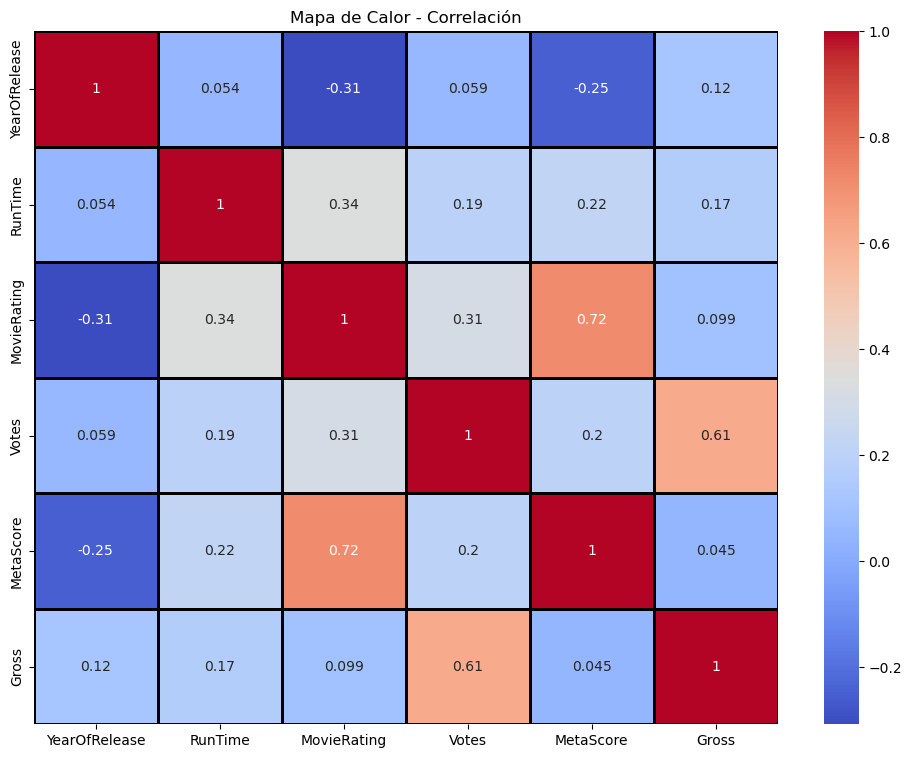

In [11]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=1, linecolor='black')
plt.title("Mapa de Calor - Correlación")
plt.show()

A partir de esta matriz de correlación podemos decir que para nuestra variable objetivo "Gross":
- YearOfRelease tiene una débil pero considerable relación con la variable objetivo.
- RunTime también tiene una correlación débil pero considerable al fin y al cabo.
- Votes es la característica que más correlación tiene con la variable objetivo, con un importante 0.61

In [12]:

df[df['YearOfRelease']>2000].sort_values(by=['YearOfRelease','MovieRating'], ascending=[False,False])

,YearOfRelease,RunTime,MovieRating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
MovieName,,,,,,,,,,,
Spider-Man: Across the Spider-Verse,2023,140,8.7,270500,86.0,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Joaquim Dos Santos', 'Kemp Powers', 'Justin K. Thompson']","['Shameik Moore', 'Hailee Steinfeld', 'Brian Tyree Henry', 'Luna Lauren Velez']","['Miles', 'Morales', 'catapults', 'across', 'the', 'Multiverse,', 'where', 'he', 'encounters', 'a', 'team', 'of', 'Spider-People', 'charged', 'with', 'protecting', 'its', 'very', 'existence.', 'When', 'the', 'heroes', 'clash', 'on', 'how', 'to', 'handle', 'a', 'new', 'threat,', 'Miles', 'must', 'redefine', 'what', 'it', 'means', 'to', 'be', 'a', 'hero.']"
Oppenheimer,2023,180,8.6,451781,88.0,NaN,"['Biography', ' Drama', ' History']",R,['Christopher Nolan'],"['Cillian Murphy', 'Emily Blunt', 'Matt Damon', 'Robert Downey Jr.']","['The', 'story', 'of', 'American', 'scientist,', 'J.', 'Robert', 'Oppenheimer,', 'and', 'his', 'role', 'in', 'the', 'development', 'of', 'the', 'atomic', 'bomb.']"
Fukrey 3,2023,147,8.3,19540,NaN,NaN,"['Comedy', ' Crime', ' Drama']",NaN,['Mrighdeep Lamba'],"['Pulkit Samrat', 'Varun Sharma', 'Manjot Singh', 'Richa Chadha']","['The', 'friends', 'facing', 'disastrously', 'funny', 'situations', 'together', 'and', 'having', 'each', ""other's"", 'backs', 'through', 'the', 'trenches', 'to', 'make', 'it', 'out', 'of', 'a', 'new', 'mess', 'this', 'time.']"
The Vaccine War,2023,161,8.2,19593,NaN,NaN,"['Drama', ' Thriller']",NaN,['Vivek Agnihotri'],"['Nivedita Bhattacharya', 'Anupam Kher', 'Nana Patekar', 'Girija Oak']","['Based', 'on', ""India's"", 'battle', 'against', 'Covid-19,', 'and', 'the', 'efforts', 'the', 'medical', 'department', 'took', 'to', 'overcome', 'the', 'global', 'crisis.']"
Checkmate,2023,112,8.1,23860,NaN,NaN,"['Action', ' Comedy']",18+,"['Akriti Bajpai', 'Harsh Beniwal']","['Harsh Beniwal', 'Mohit Chhikara', 'Aditya Paul', 'Vishal Vashishtha']","['An', 'assassin', 'gets', 'hired', 'for', 'a', 'job', 'that', 'throws', 'him', 'in', 'a', 'murky', 'pool', 'of', 'mishaps,', 'eventually', 'leading', 'to', 'a', 'baffling', 'secret.']"
...,...,...,...,...,...,...,...,...,...,...,...
Summer Catch,2001,104,5.1,16477,21.0,19690000.0,"['Comedy', ' Drama', ' Romance']",PG-13,['Michael Tollin'],"['Freddie Prinze Jr.', 'Jessica Biel', 'Fred Ward', 'Matthew Lillard']","['A', 'rich', 'girl', 'whose', 'family', 'summers', 'on', 'Cape', 'Cod', 'has', 'a', 'romance', 'with', 'a', 'local', 'poor', 'boy', 'who', 'hopes', 'to', 'become', 'a', 'major', 'league', 'baseball', 'player.']"
Say It Isn't So,2001,95,5.0,13629,21.0,5520000.0,"['Comedy', ' Romance']",R,['J.B. Rogers'],"['Chris Klein', 'Heather Graham', 'Orlando Jones', 'Sally Field']","['Jo', 'and', 'Gilly', 'date.', 'They', 'find', 'out', ""they're"", 'brother', 'and', 'sister.', 'Jo', 'moves', 'away.', 'Gilly', 'finds', 'out', 'that', ""he's"", 'not', ""Jo's"", 'brother', 'and', 'that', ""Jo's"", 'getting', 'married.', 'Can', 'he', 'stop', 'the', 'wedding', 'in', 'time?']"
Ghosts of Mars,2001,98,4.9,56683,35.0,8430000.0,"['Action', ' Horror', ' Sci-Fi']",R,['John Carpenter'],"['Natasha Henstridge', 'Ice Cube', 'Pam Grier', 'Jason Statham']","['In', '2176,', 'a', 'Martian', 'police', 'unit', 'is', 'sent', 'to', 'pick', 'up', 'a', 'highly', 'dangerous', 'criminal', 'at', 'a', 'remote', 'mining', 'post.', 'Upon', 'arrival,', 'the', 'cops', 'find', 'that', 'the', 'post', 'has', 'become', 'a', 'charnel', 'house.']"


# Catégorias

In [13]:
genres=[]

for item in df['Genre']:
    item=item.strip('[').strip(']')
    [genres.append(genre.replace("' ","'").replace("'","").strip(" ")) for genre in item.split(',')]
genres=pd.Series(genres)
genres,frequency=np.unique(genres,return_counts=True)

for i in range(len(genres)):
    print(genres[i], frequency[i])


Action 2491
Adventure 1674
Animation 480
Biography 690
Comedy 3624
Crime 2103
Drama 5885
Family 460
Fantasy 717
Film-Noir 61
History 351
Horror 1210
Music 282
Musical 133
Mystery 1092
Romance 1748
Sci-Fi 678
Sport 204
Thriller 1663
War 238
Western 112


In [17]:
y = df['Gross']

In [18]:
X = df[['YearOfRelease', 'RunTime', 'Votes']]

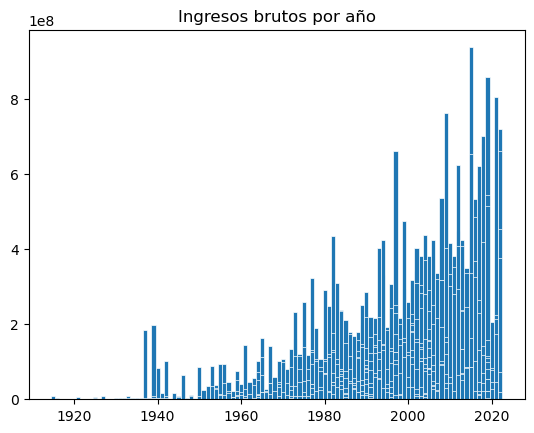

<Figure size 1800x600 with 0 Axes>

In [26]:
fig, ax = plt.subplots()
ax.bar(X['YearOfRelease'], y, width=1, edgecolor="white", linewidth=0.5)
plt.title('Ingresos brutos por año')
plt.figure(figsize=(18,6))
plt.show()

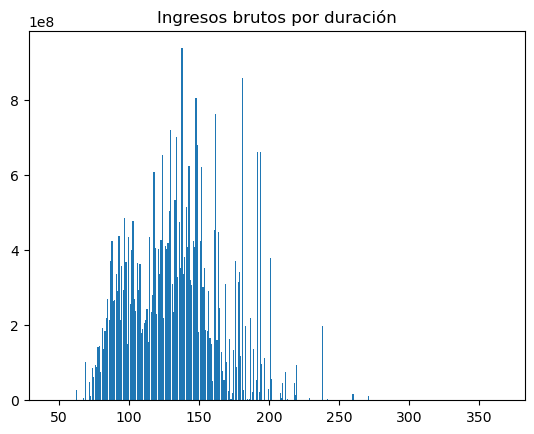

<Figure size 1600x1600 with 0 Axes>

In [27]:
fig, ax = plt.subplots()
ax.bar(X['RunTime'], y)
plt.title('Ingresos brutos por duración')
plt.figure(figsize=(16,16))
plt.show()

In [31]:
#Los votos los trataremos en el orden de los miles
X['Votes'] = X['Votes']/10**3

C:\Users\pablo\AppData\Local\Temp\ipykernel_1128\2403597135.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



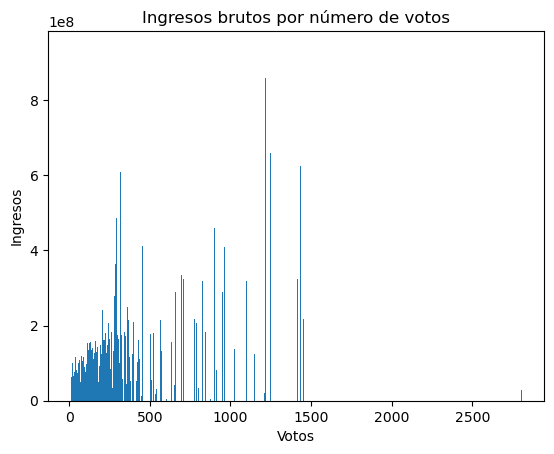

In [33]:
fig, ax = plt.subplots()
ax.bar(X['Votes'], y)
plt.title('Ingresos brutos por número de votos')
plt.xlabel("Votos")
plt.ylabel("Ingresos")
plt.show()

# Preprocesamiento de los datos

# Imputación de datos

In [144]:
from sklearn.linear_model import LinearRegression
df = pd.read_csv('cinemagix-movies.csv')

# Dividir el DataFrame en dos partes: una con valores nulos y otra sin valores nulos
df_notnull = df.dropna()
df_isnull = df[df['MetaScore'].isnull()]

# Crear un modelo de regresión lineal para MetaScore segun matriz de correlación (0.72 con MovieRating)
model = LinearRegression()
X = df_notnull[['MovieRating']]
y = df_notnull['MetaScore']
model.fit(X, y)

# Predecir los valores nulos utilizando el modelo de regresión
X_pred = df_isnull[['MovieRating']]
y_pred = model.predict(X_pred)

# Actualizar el DataFrame original con los valores predichos
df.loc[df['MetaScore'].isnull(), 'MetaScore'] = y_pred

# Imprimir el DataFrame actualizado
df

,MovieName,YearOfRelease,RunTime,MovieRating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,The Shawshank Redemption,1994,142,9.3,2804443,82.000000,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton', 'William Sadler']","['Over', 'the', 'course', 'of', 'several', 'years,', 'two', 'convicts', 'form', 'a', 'friendship,', 'seeking', 'consolation', 'and,', 'eventually,', 'redemption', 'through', 'basic', 'compassion.']"
1,The Godfather,1972,175,9.2,1954174,100.000000,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', 'Diane Keaton']","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a', 'mafia', 'family,', 'decides', 'to', 'hand', 'over', 'his', 'empire', 'to', 'his', 'youngest', 'son', 'Michael.', 'However,', 'his', 'decision', 'unintentionally', 'puts', 'the', 'lives', 'of', 'his', 'loved', 'ones', 'in', 'grave', 'danger.']"
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,98.513391,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yago Sako', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman', 'Rael Padamsee']","['An', 'anime', 'adaptation', 'of', 'the', 'Hindu', 'epic', 'the', 'Ramayana,', 'where', 'Lord', 'Ram', 'combats', 'the', 'wicked', 'king', 'Ravana.']"
3,The Chaos Class,1975,87,9.2,42231,98.513391,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Munir Ozkul', 'Halit Akcatepe', 'Tarik Akan']","['Lazy,', 'uneducated', 'students', 'share', 'a', 'very', 'close', 'bond.', 'They', 'live', 'together', 'in', 'the', 'dormitory,', 'where', 'they', 'plan', 'their', 'latest', 'pranks.', 'When', 'a', 'new', 'headmaster', 'arrives,', 'the', 'students', 'naturally', 'try', 'to', 'overthrow', 'him.', 'A', 'comic', 'war', 'of', 'nitwits', 'follows.']"
4,The Dark Knight,2008,152,9.0,2786129,84.000000,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckhart', 'Michael Caine']","['When', 'the', 'menace', 'known', 'as', 'the', 'Joker', 'wreaks', 'havoc', 'and', 'chaos', 'on', 'the', 'people', 'of', 'Gotham,', 'Batman', 'must', 'accept', 'one', 'of', 'the', 'greatest', 'psychological', 'and', 'physical', 'tests', 'of', 'his', 'ability', 'to', 'fight', 'injustice.']"
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Golmaal Again,2017,140,4.9,10183,30.410691,1010000.0,"['Action', ' Comedy', ' Fantasy']",Not Rated,['Rohit Shetty'],"['Ajay Devgn', 'Arshad Warsi', 'Tabu', 'Shreyas Talpade']","['The', 'gang', 'encounters', 'with', 'some', 'spiritual', 'bodies', 'and', 'finds', 'out', 'the', 'truth', 'about', 'the', 'Jamnadas', 'Orphanage', 'where', 'they', 'were', 'brought', 'up.']"
9996,Not to Forget,2021,84,4.9,11191,30.410691,NaN,['Drama'],NaN,['Valerio Zanoli'],"['Karen Grassle', 'Louis Gossett Jr.', ""Tatum O'Neal"", 'Cloris Leachman']","['After', 'a', 'lifetime', 'of', 'scams,', 'a', 'self-centered', 'millennial', 'is', 'sentenced', 'to', 'take', 'care', 'of', 'his', 'grandmother,', 'who', 'suffers', 'from', ""Alzheimer's.""]"
9997,Housefull 3,2016,140,4.9,10308,30.410691,1160000.0,"['Action', ' Comedy', ' Romance']",Not Rated,"['Sajid', 'Farhad Samji']","['Akshay Kumar', 'Abhishek Bachchan', 'Riteish Deshmukh', 'Jackie Shroff']","['A', 'father', ""doesn't"", 'want', 'his', 'three', 'daughters', 'to', 'get', 'married.', 'Now,', ""it's"", 'up', 'to', 'three', 'men', 'to', 'try', 'to', 'and', 'convince', 'the', 'father', 'that', ""they're"", 'a', 'good', 'fit', 'for', 'his', 'daughters.']"
9998,A.I. Rising,2018,85,4.9,11187,30.410691,NaN,"['Drama', ' Romance', ' Sci-Fi']",R,['Lazar Bodroza'],"['Sebastian Cavazza', 'Stoya', 'Marusa Majer', 'Kirsty Besterman']","['An', 'intimate', 'relationship', 'between', 'a', 'human', 'and', 'an', 'android', 'tests', 'the', 'boundaries', 'of', 'human', 'nature.']"


In [145]:
from sklearn.linear_model import LinearRegression


# Dividir el DataFrame en dos partes: una con valores nulos y otra sin valores nulos
df_notnull2 = df.dropna()
df_isnull2 = df[df['Gross'].isnull()]

# Crear un modelo de regresión lineal 
model2 = LinearRegression()
X = df_notnull2[['Votes']]
y = df_notnull2['Gross']
model2.fit(X, y)

# Predecir los valores nulos utilizando el modelo de regresión
X_pred = df_isnull2[['Votes']]
y_pred = model2.predict(X_pred)

# Actualizar el DataFrame original con los valores predichos
df.loc[df['Gross'].isnull(), 'Gross'] = y_pred

# Imprimir el DataFrame actualizado
df

,MovieName,YearOfRelease,RunTime,MovieRating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,The Shawshank Redemption,1994,142,9.3,2804443,82.000000,2.834000e+07,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton', 'William Sadler']","['Over', 'the', 'course', 'of', 'several', 'years,', 'two', 'convicts', 'form', 'a', 'friendship,', 'seeking', 'consolation', 'and,', 'eventually,', 'redemption', 'through', 'basic', 'compassion.']"
1,The Godfather,1972,175,9.2,1954174,100.000000,1.349700e+08,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', 'Diane Keaton']","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a', 'mafia', 'family,', 'decides', 'to', 'hand', 'over', 'his', 'empire', 'to', 'his', 'youngest', 'son', 'Michael.', 'However,', 'his', 'decision', 'unintentionally', 'puts', 'the', 'lives', 'of', 'his', 'loved', 'ones', 'in', 'grave', 'danger.']"
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,98.513391,1.827177e+07,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yago Sako', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman', 'Rael Padamsee']","['An', 'anime', 'adaptation', 'of', 'the', 'Hindu', 'epic', 'the', 'Ramayana,', 'where', 'Lord', 'Ram', 'combats', 'the', 'wicked', 'king', 'Ravana.']"
3,The Chaos Class,1975,87,9.2,42231,98.513391,2.442502e+07,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Munir Ozkul', 'Halit Akcatepe', 'Tarik Akan']","['Lazy,', 'uneducated', 'students', 'share', 'a', 'very', 'close', 'bond.', 'They', 'live', 'together', 'in', 'the', 'dormitory,', 'where', 'they', 'plan', 'their', 'latest', 'pranks.', 'When', 'a', 'new', 'headmaster', 'arrives,', 'the', 'students', 'naturally', 'try', 'to', 'overthrow', 'him.', 'A', 'comic', 'war', 'of', 'nitwits', 'follows.']"
4,The Dark Knight,2008,152,9.0,2786129,84.000000,5.348600e+08,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckhart', 'Michael Caine']","['When', 'the', 'menace', 'known', 'as', 'the', 'Joker', 'wreaks', 'havoc', 'and', 'chaos', 'on', 'the', 'people', 'of', 'Gotham,', 'Batman', 'must', 'accept', 'one', 'of', 'the', 'greatest', 'psychological', 'and', 'physical', 'tests', 'of', 'his', 'ability', 'to', 'fight', 'injustice.']"
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Golmaal Again,2017,140,4.9,10183,30.410691,1.010000e+06,"['Action', ' Comedy', ' Fantasy']",Not Rated,['Rohit Shetty'],"['Ajay Devgn', 'Arshad Warsi', 'Tabu', 'Shreyas Talpade']","['The', 'gang', 'encounters', 'with', 'some', 'spiritual', 'bodies', 'and', 'finds', 'out', 'the', 'truth', 'about', 'the', 'Jamnadas', 'Orphanage', 'where', 'they', 'were', 'brought', 'up.']"
9996,Not to Forget,2021,84,4.9,11191,30.410691,1.789209e+07,['Drama'],NaN,['Valerio Zanoli'],"['Karen Grassle', 'Louis Gossett Jr.', ""Tatum O'Neal"", 'Cloris Leachman']","['After', 'a', 'lifetime', 'of', 'scams,', 'a', 'self-centered', 'millennial', 'is', 'sentenced', 'to', 'take', 'care', 'of', 'his', 'grandmother,', 'who', 'suffers', 'from', ""Alzheimer's.""]"
9997,Housefull 3,2016,140,4.9,10308,30.410691,1.160000e+06,"['Action', ' Comedy', ' Romance']",Not Rated,"['Sajid', 'Farhad Samji']","['Akshay Kumar', 'Abhishek Bachchan', 'Riteish Deshmukh', 'Jackie Shroff']","['A', 'father', ""doesn't"", 'want', 'his', 'three', 'daughters', 'to', 'get', 'married.', 'Now,', ""it's"", 'up', 'to', 'three', 'men', 'to', 'try', 'to', 'and', 'convince', 'the', 'father', 'that', ""they're"", 'a', 'good', 'fit', 'for', 'his', 'daughters.']"
9998,A.I. Rising,2018,85,4.9,11187,30.410691,1.789124e+07,"['Drama', ' Romance', ' Sci-Fi']",R,['Lazar Bodroza'],"['Sebastian Cavazza', 'Stoya', 'Marusa Majer', 'Kirsty Besterman']","['An', 'intimate', 'relationship', 'between', 'a', 'human', 'and', 'an', 'android', 'tests', 'the', 'boundaries', 'of', 'human', 'nature.']"


In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Separa el conjunto de datos en dos partes: una para entrenar el modelo de clasificación y otra para imputar
df_notnull3 = df.dropna()
df_isnull3 = df[df['Certification'].isnull()]

# Divide las características y la variable objetivo
X_train = df_notnull3[['RunTime']]
y_train = df_notnull3['Certification']

# Entrena un modelo de clasificación (Random Forest, en este caso)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Utiliza el modelo entrenado para predecir los valores categóricos en el conjunto de datos de imputación
X_impute = df_isnull3[['RunTime']]
predicted_values = model.predict(X_impute)

# Reemplaza los valores nulos en el conjunto de datos original con las predicciones del modelo
df.loc[df['Certification'].isnull(), 'Certification'] = predicted_values

df

,MovieName,YearOfRelease,RunTime,MovieRating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,The Shawshank Redemption,1994,142,9.3,2804443,82.000000,2.834000e+07,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton', 'William Sadler']","['Over', 'the', 'course', 'of', 'several', 'years,', 'two', 'convicts', 'form', 'a', 'friendship,', 'seeking', 'consolation', 'and,', 'eventually,', 'redemption', 'through', 'basic', 'compassion.']"
1,The Godfather,1972,175,9.2,1954174,100.000000,1.349700e+08,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', 'Diane Keaton']","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a', 'mafia', 'family,', 'decides', 'to', 'hand', 'over', 'his', 'empire', 'to', 'his', 'youngest', 'son', 'Michael.', 'However,', 'his', 'decision', 'unintentionally', 'puts', 'the', 'lives', 'of', 'his', 'loved', 'ones', 'in', 'grave', 'danger.']"
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,98.513391,1.827177e+07,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yago Sako', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman', 'Rael Padamsee']","['An', 'anime', 'adaptation', 'of', 'the', 'Hindu', 'epic', 'the', 'Ramayana,', 'where', 'Lord', 'Ram', 'combats', 'the', 'wicked', 'king', 'Ravana.']"
3,The Chaos Class,1975,87,9.2,42231,98.513391,2.442502e+07,"['Comedy', ' Drama']",R,['Ertem Egilmez'],"['Kemal Sunal', 'Munir Ozkul', 'Halit Akcatepe', 'Tarik Akan']","['Lazy,', 'uneducated', 'students', 'share', 'a', 'very', 'close', 'bond.', 'They', 'live', 'together', 'in', 'the', 'dormitory,', 'where', 'they', 'plan', 'their', 'latest', 'pranks.', 'When', 'a', 'new', 'headmaster', 'arrives,', 'the', 'students', 'naturally', 'try', 'to', 'overthrow', 'him.', 'A', 'comic', 'war', 'of', 'nitwits', 'follows.']"
4,The Dark Knight,2008,152,9.0,2786129,84.000000,5.348600e+08,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckhart', 'Michael Caine']","['When', 'the', 'menace', 'known', 'as', 'the', 'Joker', 'wreaks', 'havoc', 'and', 'chaos', 'on', 'the', 'people', 'of', 'Gotham,', 'Batman', 'must', 'accept', 'one', 'of', 'the', 'greatest', 'psychological', 'and', 'physical', 'tests', 'of', 'his', 'ability', 'to', 'fight', 'injustice.']"
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Golmaal Again,2017,140,4.9,10183,30.410691,1.010000e+06,"['Action', ' Comedy', ' Fantasy']",Not Rated,['Rohit Shetty'],"['Ajay Devgn', 'Arshad Warsi', 'Tabu', 'Shreyas Talpade']","['The', 'gang', 'encounters', 'with', 'some', 'spiritual', 'bodies', 'and', 'finds', 'out', 'the', 'truth', 'about', 'the', 'Jamnadas', 'Orphanage', 'where', 'they', 'were', 'brought', 'up.']"
9996,Not to Forget,2021,84,4.9,11191,30.410691,1.789209e+07,['Drama'],R,['Valerio Zanoli'],"['Karen Grassle', 'Louis Gossett Jr.', ""Tatum O'Neal"", 'Cloris Leachman']","['After', 'a', 'lifetime', 'of', 'scams,', 'a', 'self-centered', 'millennial', 'is', 'sentenced', 'to', 'take', 'care', 'of', 'his', 'grandmother,', 'who', 'suffers', 'from', ""Alzheimer's.""]"
9997,Housefull 3,2016,140,4.9,10308,30.410691,1.160000e+06,"['Action', ' Comedy', ' Romance']",Not Rated,"['Sajid', 'Farhad Samji']","['Akshay Kumar', 'Abhishek Bachchan', 'Riteish Deshmukh', 'Jackie Shroff']","['A', 'father', ""doesn't"", 'want', 'his', 'three', 'daughters', 'to', 'get', 'married.', 'Now,', ""it's"", 'up', 'to', 'three', 'men', 'to', 'try', 'to', 'and', 'convince', 'the', 'father', 'that', ""they're"", 'a', 'good', 'fit', 'for', 'his', 'daughters.']"
9998,A.I. Rising,2018,85,4.9,11187,30.410691,1.789124e+07,"['Drama', ' Romance', ' Sci-Fi']",R,['Lazar Bodroza'],"['Sebastian Cavazza', 'Stoya', 'Marusa Majer', 'Kirsty Besterman']","['An', 'intimate', 'relationship', 'between', 'a', 'human', 'and', 'an', 'android', 'tests', 'the', 'boundaries', 'of', 'human', 'nature.']"
